Fitting 2 folds for each of 100 candidates, totalling 200 fits


C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1081, in fit
    train_dmatrix, evals = _wrap_evaluation

Best Parameters: {'subsample': 0.9, 'n_estimators': 400, 'max_depth': 6, 'learning_rate': 0.005, 'lambda': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.9, 'alpha': 0}
Final RMSE: 4.37841796875
Future Predictions (2024-2026):
Year 2024: 6693.58
Year 2025: 6693.58
Year 2026: 6693.58


C:\Users\Jiacheng Zheng\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


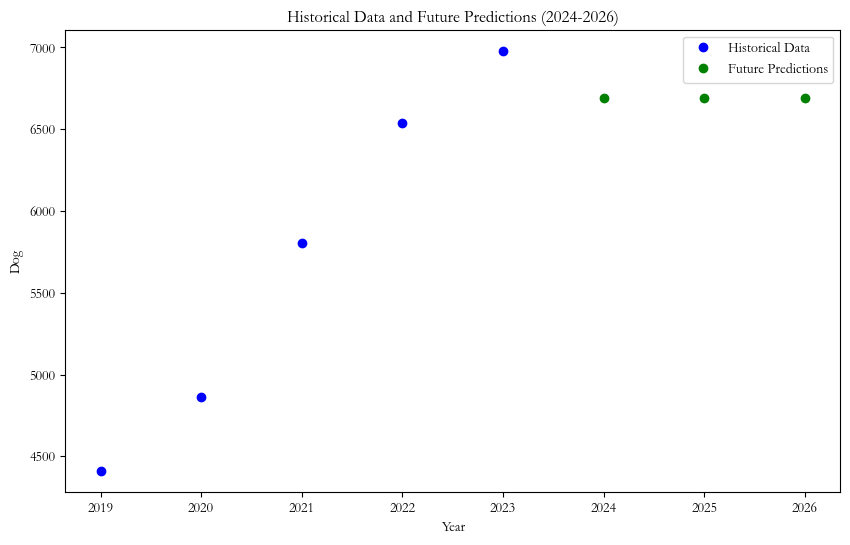

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Garamond'
plt.rcParams['font.style'] = 'normal'

# Step 1: 创建数据集
data = pd.DataFrame({
    "Years": [2019, 2020, 2021, 2022, 2023],
    "Dog": [4412, 4862, 5806, 6536, 6980]
})

# 特征和目标
X = data[["Years"]]
y = data["Dog"]

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: 创建 XGBoost 回归器
model = xgb.XGBRegressor(objective="reg:squarederror")

# Step 3: 定义超参数空间
param_dist = {
    "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 12, 15],
    "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [10, 50, 100, 200, 300, 400, 500, 1000],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "alpha": [0, 0.01, 0.1, 0.5, 1, 10, 20],
    "lambda": [0, 0.01, 0.1, 0.5, 1, 2, 5],
    "gamma": [0, 0.1, 0.5, 1, 2]
}

# Step 4: 使用 RandomizedSearchCV 调参
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=2, verbose=1, random_state=42)

random_search.fit(X_train, y_train)

# 输出最佳参数
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Step 5: 使用最佳参数训练模型
best_model = random_search.best_estimator_

# 预测与评估
y_pred = best_model.predict(X_test)
final_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Final RMSE:", final_rmse)

# 可视化 RMSE 随试验次数变化
# results = random_search.cv_results_
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=range(len(results['mean_test_score'])), y=-results['mean_test_score'])
# plt.xlabel("Trial Number")
# plt.ylabel("RMSE")
# plt.title("RMSE vs. Trial Number")
# plt.show()

# # Step 6: 可视化预测值与真实值
# plt.figure(figsize=(10, 6))
# plt.plot(X_test, y_test, 'bo', label='Actual')
# plt.plot(X_test, y_pred, 'r-', label='Predicted')
# plt.xlabel('Year')
# plt.ylabel('Dog')
# plt.legend()
# plt.title("Predicted vs. Actual Values")
# plt.show()

# Step 7: 未来三年预测
future_years = pd.DataFrame({"Years": [2024, 2025, 2026]})
future_predictions = best_model.predict(future_years)

# 输出未来三年预测值
print("Future Predictions (2024-2026):")
for year, prediction in zip(future_years['Years'], future_predictions):
    print(f"Year {year}: {prediction:.2f}")

# Step 8: 可视化未来三年预测
plt.figure(figsize=(10, 6))
plt.plot(data['Years'], data['Dog'], 'bo', label='Historical Data')
plt.plot(future_years['Years'], future_predictions, 'go', label='Future Predictions')
plt.xlabel('Year')
plt.ylabel('Dog')
plt.legend()
plt.title("Historical Data and Future Predictions (2024-2026)")
plt.show()
